In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
social = pd.read_csv('Social_Network_Ads.csv')

In [4]:
pd.concat([social.head(), social.tail()])

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


# Data Set Analysis

In [5]:
social.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

# Who Purchased / Who Not purchased

<AxesSubplot:xlabel='Purchased', ylabel='count'>

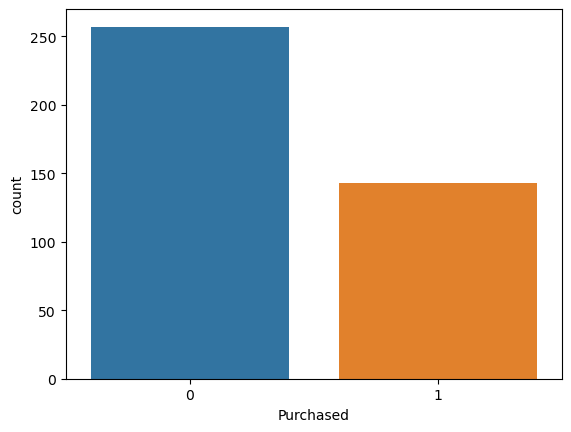

In [6]:
sns.countplot(x='Purchased', data = social)

# How Many Males & Females Purchased

<AxesSubplot:xlabel='Purchased', ylabel='count'>

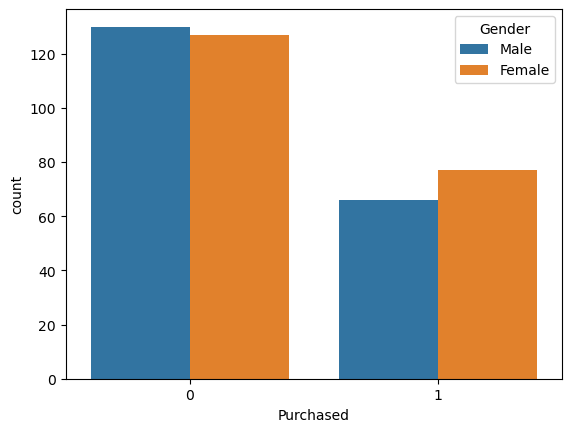

In [7]:
sns.countplot(x='Purchased', hue='Gender',  data = social)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

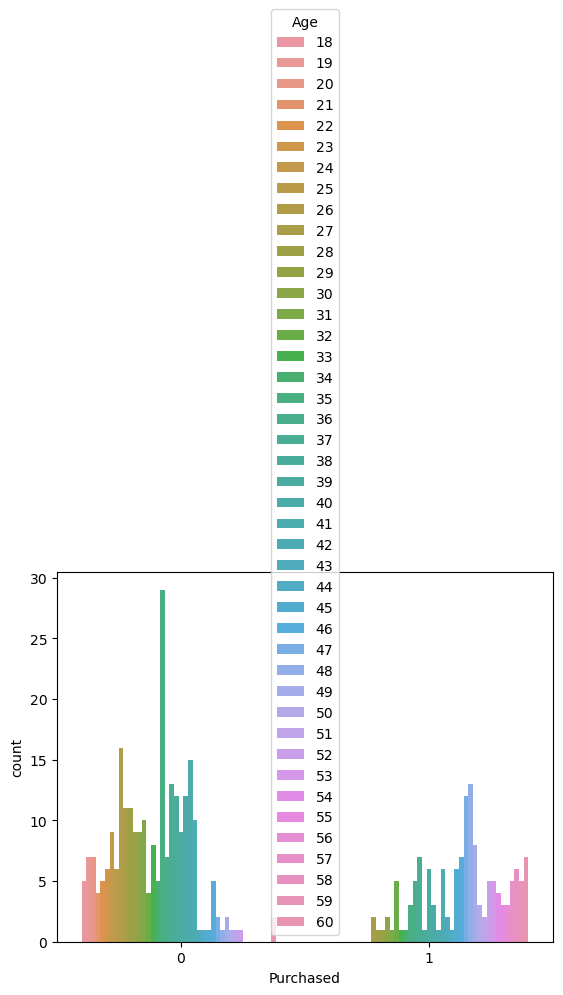

In [8]:
sns.countplot(x='Purchased', hue='Age',  data = social)

In [9]:
social.drop('User ID',axis=1 , inplace=True)

# Change Categorical Variable To Dummies

In [10]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [11]:
gender = pd.get_dummies(social['Gender'], drop_first=True)

In [12]:
social.drop('Gender',axis=1, inplace=True)

In [13]:
social = pd.concat([social,gender], axis=1)

In [14]:
social

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


# Splitn Data

In [15]:
x = social.iloc[:,[0,1,3]]
y = social.iloc[:, 2]

In [16]:
x

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

# Feature Scaling

In [18]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [19]:
x

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

# SPlit DATA tO TRain And tesT SeT

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.01, random_state=0)

# Fit / Train Model

In [28]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

# Prediction

In [29]:
y_pred = classifier.predict(x_test)

In [30]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' :y_pred})

# Evaluate MODEL

In [31]:
result

,Actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0


In [32]:
y_pred

array([0, 0, 0, 0], dtype=int64)

# Accuracy 

In [33]:
print('Accuracy of model')
print(accuracy_score(y_test,y_pred) * 100, '%')

Accuracy of model
100.0 %
